In [1]:
import xarray as xr
from matplotlib import pyplot as plt
from numpy import cumsum, insert

Load bcg grid info

In [2]:
#constants from data
a = 2.e-4
b = 0.0
rhoc = 999.8
refT = [30.,27.,24.,21.,18.,15.,13.,11.,9.,7.,6.,5.,4.,3.,2.]
# dummy for refS
refS = refT

In [3]:
dynd = xr.open_dataset('dynDiag.0000000000.t001.nc')
grid = xr.open_dataset('grid.t001.nc')

In [4]:
grid

<xarray.Dataset> Size: 641kB
Dimensions:  (Z: 15, Zp1: 16, Zu: 15, Zl: 15, X: 32, Y: 37, Xp1: 33, Yp1: 38)
Coordinates:
  * Z        (Z) float64 120B -25.0 -80.0 -145.0 ... -1.52e+03 -1.705e+03
  * Zp1      (Zp1) float64 128B 0.0 -50.0 -110.0 ... -1.61e+03 -1.8e+03
  * Zu       (Zu) float64 120B -50.0 -110.0 -180.0 ... -1.61e+03 -1.8e+03
  * Zl       (Zl) float64 120B 0.0 -50.0 -110.0 ... -1.43e+03 -1.61e+03
  * X        (X) float64 256B -0.5 0.5 1.5 2.5 3.5 ... 26.5 27.5 28.5 29.5 30.5
  * Y        (Y) float64 296B 39.5 40.5 41.5 42.5 43.5 ... 72.5 73.5 74.5 75.5
  * Xp1      (Xp1) float64 264B -1.0 0.0 1.0 2.0 3.0 ... 28.0 29.0 30.0 31.0
  * Yp1      (Yp1) float64 304B 39.0 40.0 41.0 42.0 43.0 ... 73.0 74.0 75.0 76.0
Data variables: (12/30)
    RC       (Z) float64 120B ...
    RF       (Zp1) float64 128B ...
    RU       (Zu) float64 120B ...
    RL       (Zl) float64 120B ...
    drC      (Zp1) float64 128B ...
    drF      (Z) float64 120B ...
    ...       ...
    R_low    (Y, X) float64 9kB ...
    Ro_surf  (Y, X) float64 9kB ...
    Depth    (Y, X) float64 9kB ...
    HFacC    (Z, Y, X) float64 142kB ...
    HFacW    (Z, Y, Xp1) float64 147kB ...
    HFacS    (Z, Yp1, X) float64 146kB ...
Attributes: (12/21)
    MITgcm_version:  checkpoint69b
    build_user:      ivana
    build_host:      CRIOS-A69658
    build_date:      Tue Dec  3 16:23:34 CST 2024
    MITgcm_URL:      http://mitgcm.org
    MITgcm_tag_id:   
    ...              ...
    nSy:             1
    nPx:             1
    nPy:             1
    Nx:              32
    Ny:              37
    Nr:              15

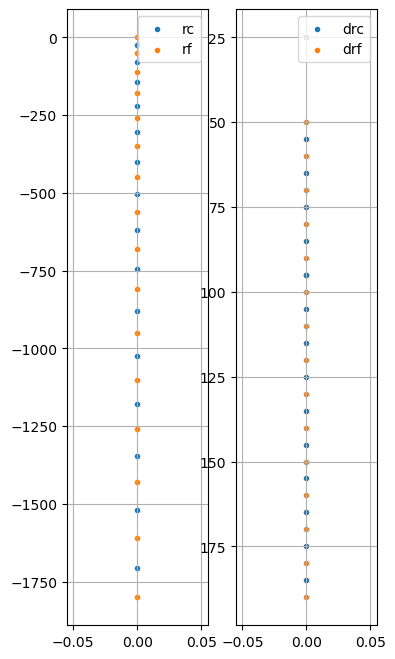

In [5]:
# from bcg
f, ax = plt.subplots(1,2, figsize=(4,8))

ax[0].scatter(0*grid.RC,grid.RC, marker='.',label='rc')
ax[0].scatter(0*grid.RF,grid.RF, marker='.',label='rf')
ax[0].legend()
ax[0].grid()

ax[1].scatter(0*grid.drC,grid.drC, marker='.',label='drc')
ax[1].scatter(0*grid.drF,grid.drF, marker='.',label='drf')
ax[1].legend()
ax[1].grid()
ax[1].yaxis.set_inverted(True) 
plt.show()

Load na strip info, contains 90 depth levels

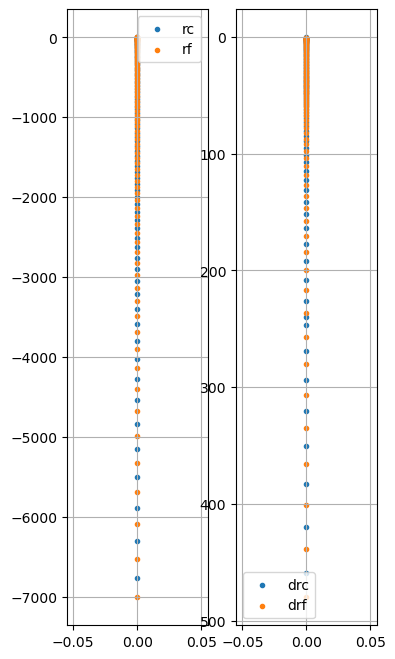

In [6]:
#from na strip
tRef =  [18.89, 18.89, 18.89, 18.89, 18.89, 18.87,
         18.85, 18.82, 18.80, 18.73, 18.65, 18.57,
         18.40, 18.22, 18.00, 17.74, 17.44, 17.12,
         16.76, 16.39, 15.98, 15.55, 15.08, 14.59,
         14.07, 13.53, 12.99, 12.47, 11.97, 11.49,
         11.02, 10.57, 10.12,  9.71,  9.27,  8.88,
          8.46,  8.09,  7.71,  7.37,  7.03,  6.72,
          6.42,  6.13,  5.86,  5.59,  5.34,  5.09,
          4.87,  4.65,  4.45,  4.26,  4.08,  3.91,
          3.75,  3.60,  3.47,  3.33,  3.20,  3.08,
          2.96,  2.84,  2.73,  2.62,  2.51,  2.42,
          2.32,  2.23,  2.14,  2.06,  1.98,  1.90,
          1.81,  1.73,  1.65,  1.57,  1.49,  1.41,
          1.33,  1.24,  1.15,  1.06,  0.98,  0.94,
          0.91,  0.92,  0.98,  0.98,  0.98,  0.98]
 
sRef =  [34.84, 34.84, 34.84, 34.84, 34.84, 34.84,
         34.85, 34.85, 34.85, 34.86, 34.87, 34.88,
         34.89, 34.90, 34.92, 34.94, 34.96, 34.98,
         35.00, 35.02, 35.04, 35.06, 35.07, 35.07,
         35.07, 35.05, 35.03, 35.01, 34.98, 34.95,
         34.92, 34.89, 34.85, 34.82, 34.79, 34.76,
         34.73, 34.71, 34.68, 34.66, 34.64, 34.62,
         34.61, 34.60, 34.59, 34.59, 34.58, 34.58,
         34.59, 34.59, 34.60, 34.60, 34.61, 34.62,
         34.63, 34.64, 34.65, 34.66, 34.67, 34.68,
         34.69, 34.70, 34.71, 34.71, 34.72, 34.72,
         34.73, 34.73, 34.74, 34.74, 34.74, 34.74,
         34.75, 34.74, 34.74, 34.74, 34.74, 34.74,
         34.74, 34.74, 34.73, 34.73, 34.73, 34.73,
         34.73, 34.72, 34.72, 34.72, 34.72, 34.72]
 
delR = [  1.00,    1.14,    1.30,    1.49,   1.70,
          1.93,    2.20,    2.50,    2.84,   3.21,
          3.63,    4.10,    4.61,    5.18,   5.79,
          6.47,    7.20,    7.98,    8.83,   9.73,
         10.69,   11.70,   12.76,   13.87,  15.03,
         16.22,   17.45,   18.70,   19.97,  21.27,
         22.56,   23.87,   25.17,   26.46,  27.74,
         29.00,   30.24,   31.45,   32.65,  33.82,
         34.97,   36.09,   37.20,   38.29,  39.37,
         40.45,   41.53,   42.62,   43.73,  44.87,
         46.05,   47.28,   48.56,   49.93,  51.38,
         52.93,   54.61,   56.42,   58.38,  60.53,
         62.87,   65.43,   68.24,   71.33,  74.73,
         78.47,   82.61,   87.17,   92.21,  97.79,
        103.96,  110.79,  118.35,  126.73, 136.01,
        146.30,  157.71,  170.35,  184.37, 199.89,
        217.09,  236.13,  257.21,  280.50, 306.24,
        334.64,  365.93,  400.38,  438.23, 479.74]

drC = []
for i in range(len(delR)):
    drC.append( (delR[i-1] + delR[i])/2. ) 
drC[0] = delR[0]/2.
drC.append(delR[-1]/2.)

rc = -cumsum(drC)[:-1]
rf = -cumsum(delR)
rf = insert(rf, 0, 0)


f, ax = plt.subplots(1,2, figsize=(4,8))

ax[0].scatter(0*rc,rc, marker='.',label='rc')
ax[0].scatter(0*rf,rf, marker='.',label='rf')
ax[0].legend()
ax[0].grid()

ax[1].scatter([0 for i in range(len(drC))],drC, marker='.',label='drc')
ax[1].scatter([0 for i in range(len(delR))],delR, marker='.',label='drf')
ax[1].legend()
ax[1].grid()
ax[1].yaxis.set_inverted(True)
plt.show()

Create tref for 100 depth levels defined by Verdy, A.

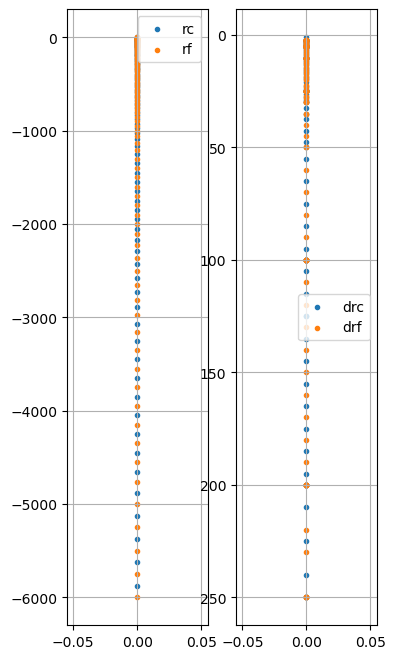

In [7]:
# from TPOSE
drf100 = [ 2, 2, 2, 2, 2, 
          2.2, 2.4, 2.6, 2.8, 3.1, 
          3.3, 3.6, 4, 4, 4.5, 
          5, 5, 5, 5, 5, 
          5, 5.5, 5.5, 5.5, 5.5, 
          5.5, 6, 7, 8, 9, 
          10, 10, 10, 10, 10, 
          10, 10, 11, 12, 13, 
          14, 15, 16, 17, 18, 
          19, 20, 22, 23, 25, 
          25, 25, 25, 25, 25, 
          25, 25, 27, 28, 30, 
          30, 30, 35, 35, 40, 
          45, 50, 50, 60, 70, 
          80, 90, 100, 100, 100, 
          100, 100, 100, 100, 110, 
          120, 130, 140, 150, 160, 
          170, 180, 190, 200, 200, 
          200, 200, 200, 200, 220, 
          230, 250, 250, 250, 250 ]

drc100 = [drf100[0]/2.]
for i in range(len(drf100)-1):
    drc100.append( (drf100[i] + drf100[i+1])/2. ) 
drc100.append(drf100[-1]/2.)

rc100 = -cumsum(drc100)[:-1]
rf100 = -cumsum(drf100)
rf100 = insert(rf100, 0, 0)

f, ax = plt.subplots(1,2, figsize=(4,8))

ax[0].scatter(0*rc100,rc100, marker='.',label='rc')
ax[0].scatter(0*rf100,rf100, marker='.',label='rf')
# ax[0].set_ylim([-50,1])
ax[0].legend()
ax[0].grid()

ax[1].scatter([0 for i in range(len(drc100))],drc100, marker='.',label='drc')
ax[1].scatter([0 for i in range(len(drf100))],drf100, marker='.',label='drf')
ax[1].legend()
ax[1].grid()
# ax[1].set_ylim([50,-1])
ax[1].yaxis.set_inverted(True)
plt.show()

In [8]:
# interpolate tref100 from bcg and na strip
from numpy import interp

tref100 = []
for z in rc100:
    if z >= -25:
        tref100.append(refT[0])
        
    elif z >= -1600:
        tref100.append( interp(z, grid.RC.data[::-1], refT[::-1]) )

    else: 
        tref100.append( interp(z, rc[::-1], tRef[::-1]) )


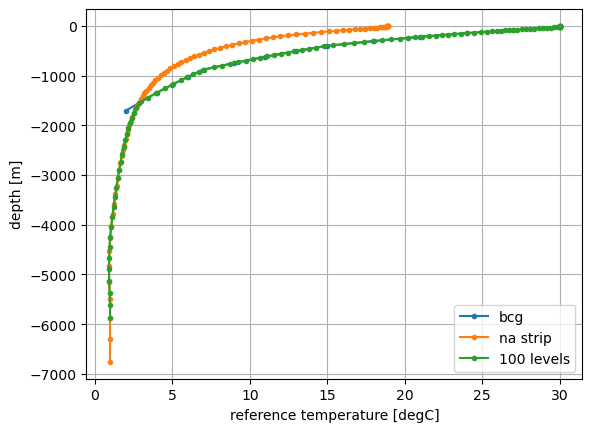

tRef=
30.000, 30.000, 30.000, 30.000, 30.000, 30.000, 30.000, 30.000, 30.000, 30.000, 30.000, 29.825, 29.618, 29.400, 29.168, 28.909, 28.636, 28.364, 28.091, 27.818, 27.545, 27.259, 26.965, 26.712, 26.458, 26.204, 25.938, 25.638, 25.292, 24.900, 24.462, 24.000, 23.600, 23.200, 22.800, 22.400, 22.000, 21.580, 21.120, 20.665, 20.188, 19.676, 19.129, 18.547, 17.937, 17.353, 16.737, 16.074, 15.363, 14.762, 14.286, 13.810, 13.333, 12.870, 12.435, 12.000, 11.565, 11.113, 10.664, 10.200, 9.720, 9.240, 8.741, 8.222, 7.667, 7.037, 6.690, 6.345, 5.968, 5.548, 5.065, 4.545, 3.971, 3.400, 2.838, 2.669, 2.516, 2.396, 2.279, 2.171, 2.069, 1.970, 1.868, 1.763, 1.667, 1.572, 1.480, 1.392, 1.303, 1.212, 1.127, 1.050, 0.985, 0.953, 0.927, 0.912, 0.919, 0.959, 0.980, 0.980

delR=
2.0, 2.0, 2.0, 2.0, 2.0, 2.2, 2.4, 2.6, 2.8, 3.1, 3.3, 3.6, 4.0, 4.0, 4.5, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.5, 5.5, 5.5, 5.5, 5.5, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 

In [9]:
#report bcg deep vertical grid

plt.plot(refT, grid.RC, marker='.', label='bcg')
plt.plot(tRef, rc, marker='.',label='na strip')
plt.plot(tref100,rc100, marker='.',label='100 levels')

plt.ylabel('depth [m]')
plt.xlabel('reference temperature [degC]')
plt.grid()
plt.legend()
plt.show()

# print for `data` file
print('tRef=')
formatted = [f"{x:.3f}" for x in tref100]
print(", ".join(formatted))

print('\ndelR=')
formatted = [f"{x:.1f}" for x in drf100]
print(", ".join(formatted)) 

#### load output

In [5]:
dynd

<xarray.Dataset> Size: 43MB
Dimensions:      (T: 100, Zmd000015: 15, X: 32, Y: 37, Xp1: 33, Yp1: 38,
                  Zld000015: 15)
Coordinates:
  * T            (T) float64 800B 3.11e+07 6.221e+07 ... 3.079e+09 3.11e+09
  * X            (X) float64 256B -0.5 0.5 1.5 2.5 3.5 ... 27.5 28.5 29.5 30.5
  * Y            (Y) float64 296B 39.5 40.5 41.5 42.5 ... 72.5 73.5 74.5 75.5
  * Xp1          (Xp1) float64 264B -1.0 0.0 1.0 2.0 3.0 ... 28.0 29.0 30.0 31.0
  * Yp1          (Yp1) float64 304B 39.0 40.0 41.0 42.0 ... 73.0 74.0 75.0 76.0
Dimensions without coordinates: Zmd000015, Zld000015
Data variables:
    iter         (T) int32 400B ...
    diag_levels  (Zmd000015) float64 120B ...
    THETA        (T, Zmd000015, Y, X) float32 7MB ...
    SALT         (T, Zmd000015, Y, X) float32 7MB ...
    PHIHYD       (T, Zmd000015, Y, X) float32 7MB ...
    UVEL         (T, Zmd000015, Y, Xp1) float32 7MB ...
    VVEL         (T, Zmd000015, Yp1, X) float32 7MB ...
    WVEL         (T, Zld000015, Y, X) float32 7MB ...
Attributes: (12/21)
    MITgcm_version:  checkpoint69b
    build_user:      ivana
    build_host:      CRIOS-A69658
    build_date:      Tue Dec  3 16:23:34 CST 2024
    MITgcm_URL:      http://mitgcm.org
    MITgcm_tag_id:   
    ...              ...
    nSy:             1
    nPx:             1
    nPy:             1
    Nx:              32
    Ny:              37
    Nr:              15

In [6]:
t = 0; i = 10; j = 10
rhoAnom = rhoc * ( -a*(dynd.THETA[t,:,j,i] - refT) + b*(dynd.SALT[t,:,j,i] - refS) )
rho = rhoAnom + rhoc

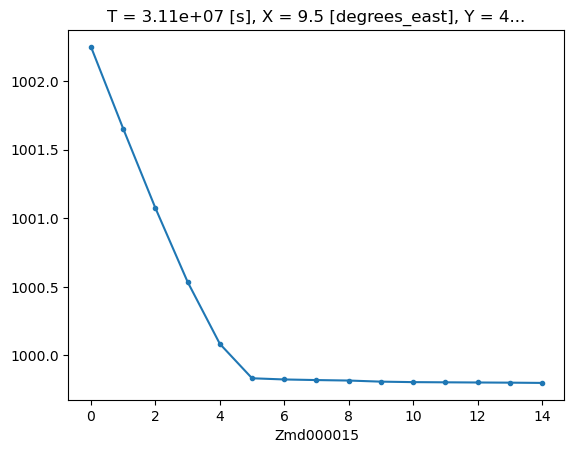

In [7]:
rho.plot(marker='.')
plt.show()

In [8]:
print( 'RC: ', grid.RC.data, '\ndrC: ', grid.drC.data )

RC:  [  -25.   -80.  -145.  -220.  -305.  -400.  -505.  -620.  -745.  -880.
 -1025. -1180. -1345. -1520. -1705.] 
drC:  [ 25.  55.  65.  75.  85.  95. 105. 115. 125. 135. 145. 155. 165. 175.
 185.  95.]


In [9]:
drho = rho[1:] - rho[:-1]
drho = -drho
dz = grid.drC[1:-1]

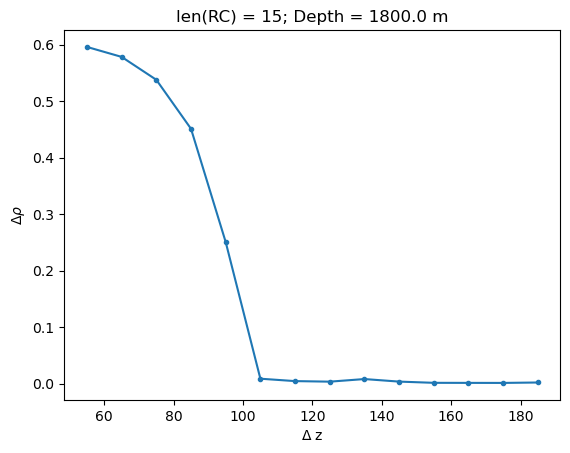

In [10]:
plt.plot(dz.data, drho.data, marker='.')
plt.xlabel(r'$\Delta$ z')
plt.ylabel(r'$\Delta \rho$')
plt.title( f'len(RC) = {grid.RC.shape[0]}; Depth = {-grid.RF.data[-1]} m' )

plt.show()

#### Alternative

Since we use `eostype='LINEAR'`, we can directly use the density anomaly. This is because the equation of state is a linear fxn.

In [11]:
drhoAnom = rhoAnom[1:] - rhoAnom[:-1]
drhoAnom = -drhoAnom

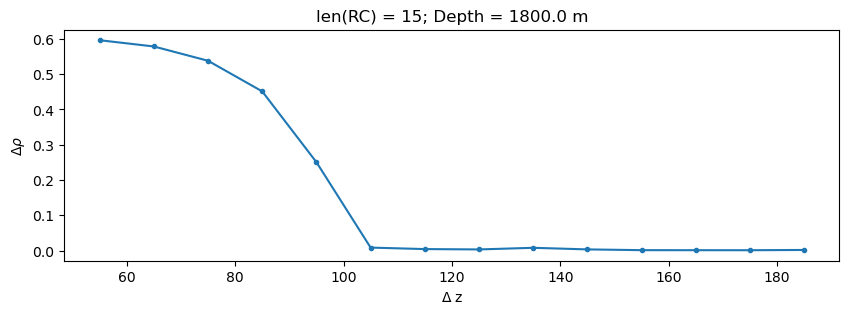

In [12]:
plt.figure(figsize=(10,3))

plt.plot(dz.data, drhoAnom.data, marker='.')
plt.xlabel(r'$\Delta$ z')
plt.ylabel(r'$\Delta \rho$')
plt.title( f'len(RC) = {grid.RC.shape[0]}; Depth = {-grid.RF.data[-1]} m' )

plt.show()

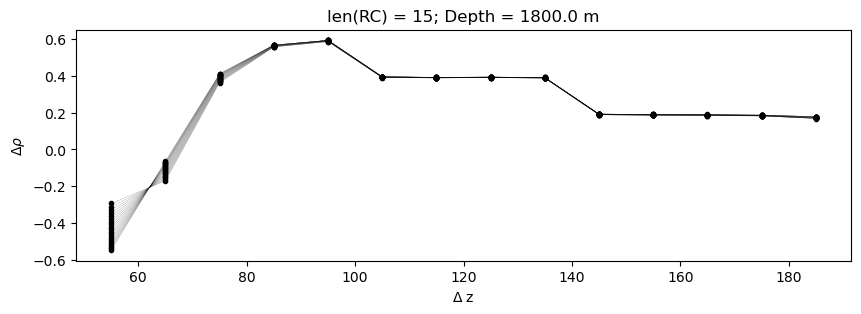

In [25]:
rhoAnom = rhoc * ( -a*(dynd.THETA[:,:,j,i] - refT) + b*(dynd.SALT[:,:,j,i] - refS) )
drhoAnom = -1*(rhoAnom[:,1:] - rhoAnom[:,:-1])

plt.figure(figsize=(10,3))

for t in range(60,80):
    plt.plot(dz.data, drhoAnom.data[t,:], marker='.', c='k', lw=0.1)

plt.xlabel(r'$\Delta$ z')
plt.ylabel(r'$\Delta \rho$')
plt.title( f'len(RC) = {grid.RC.shape[0]}; Depth = {-grid.RF.data[-1]} m' )

plt.show()

## Spatial variation at 60 year spin up


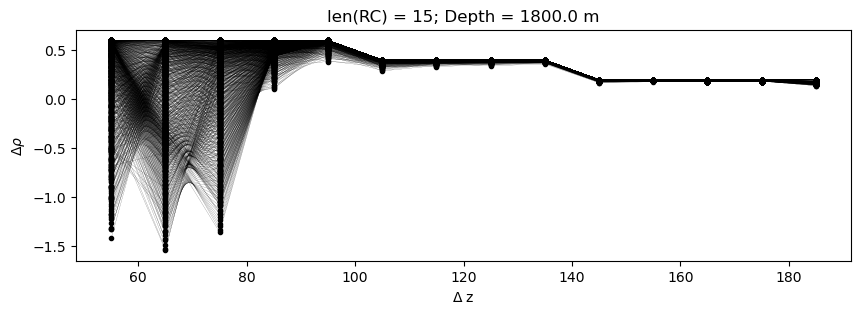

In [27]:
t = 61
plt.figure(figsize=(10,3))

for j in range(37):
    for i in range(32):
        rhoAnom = rhoc * ( -a*(dynd.THETA[t,:,j,i] - refT) + b*(dynd.SALT[t,:,j,i] - refS) )
        drhoAnom = -1*(rhoAnom[1:] - rhoAnom[:-1])

        plt.plot(dz.data, drhoAnom.data, marker='.', c='k', lw=0.1)
        
plt.xlabel(r'$\Delta$ z')
plt.ylabel(r'$\Delta \rho$')
plt.title( f'len(RC) = {grid.RC.shape[0]}; Depth = {-grid.RF.data[-1]} m' )

plt.show()

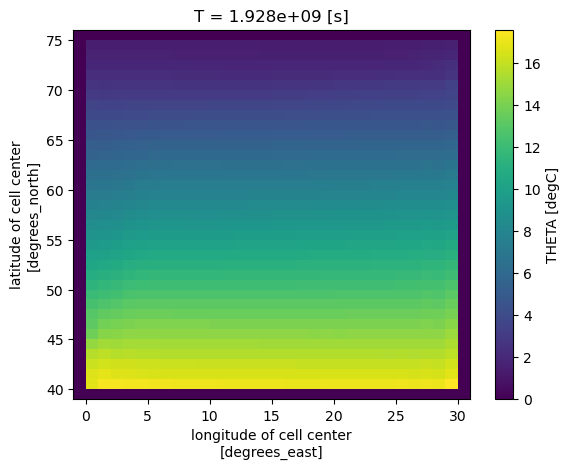

In [30]:
dynd.THETA.isel(Zmd000015=0,T=61).plot()

# Munk profile

The analytical Munk profile contains a convergence zone from 0 - 4800 meter depths. We extend the baroclinic gyre to hopefully capture a convergence zone.

We also use A. Verdy's vertical discretization to capture 100 depth levels up to 6000 meter depth. She work on this discretization for the TPOSE project, and explained that she was trying to achieve a vertical discretization that is close to isopycnal in the mixed layer. 

In [14]:
import numpy as np
DRF = [0, 2, 2, 2, 2, 2, 2.2, 2.4, 2.6, 2.8, 3.1, 3.3, 3.6, 
       4, 4, 4.5, 5, 5, 5, 5, 5, 5, 5.5, 5.5, 5.5, 5.5, 5.5, 
       6, 7, 8, 9, 10, 10, 10, 10, 10, 10, 10,
       11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       22, 23, 25, 25, 25, 25, 25, 25, 25, 25,
       27, 28, 30, 30, 30, 35, 35, 40, 45, 50, 50,
       60, 70, 80, 90, 100, 100, 100, 100, 100, 100, 100,
       110, 120, 130, 140, 150, 160, 170, 180,
       190, 200, 200, 200, 200, 200, 200, 220, 230,
       250, 250, 250, 250];
np.cumsum(DRF)

array([0.00e+00, 2.00e+00, 4.00e+00, 6.00e+00, 8.00e+00, 1.00e+01,
       1.22e+01, 1.46e+01, 1.72e+01, 2.00e+01, 2.31e+01, 2.64e+01,
       3.00e+01, 3.40e+01, 3.80e+01, 4.25e+01, 4.75e+01, 5.25e+01,
       5.75e+01, 6.25e+01, 6.75e+01, 7.25e+01, 7.80e+01, 8.35e+01,
       8.90e+01, 9.45e+01, 1.00e+02, 1.06e+02, 1.13e+02, 1.21e+02,
       1.30e+02, 1.40e+02, 1.50e+02, 1.60e+02, 1.70e+02, 1.80e+02,
       1.90e+02, 2.00e+02, 2.11e+02, 2.23e+02, 2.36e+02, 2.50e+02,
       2.65e+02, 2.81e+02, 2.98e+02, 3.16e+02, 3.35e+02, 3.55e+02,
       3.77e+02, 4.00e+02, 4.25e+02, 4.50e+02, 4.75e+02, 5.00e+02,
       5.25e+02, 5.50e+02, 5.75e+02, 6.00e+02, 6.27e+02, 6.55e+02,
       6.85e+02, 7.15e+02, 7.45e+02, 7.80e+02, 8.15e+02, 8.55e+02,
       9.00e+02, 9.50e+02, 1.00e+03, 1.06e+03, 1.13e+03, 1.21e+03,
       1.30e+03, 1.40e+03, 1.50e+03, 1.60e+03, 1.70e+03, 1.80e+03,
       1.90e+03, 2.00e+03, 2.11e+03, 2.23e+03, 2.36e+03, 2.50e+03,
       2.65e+03, 2.81e+03, 2.98e+03, 3.16e+03, 3.35e+03, 3.55e

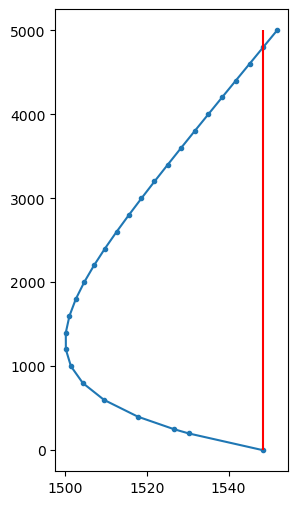

In [15]:
munkz = [    0.0,200.0,250.0,400.0,600.0,800.0,1000.0,1200.0,1400.0,
         1600.0,1800.0,2000.0,2200.0,2400.0,2600.0,2800.0,3000.0,3200.0,
         3400.0,3600.0,3800.0,4000.0,4200.0,4400.0,4600.0,4800.0,5000.0 ]

munkssp = [ 1548.52,1530.29,1526.69,1517.78,1509.49,1504.30,1501.38,1500.14,1500.12,
           1501.02,1502.57,1504.62,1507.02,1509.69,1512.55,1515.56,1518.67,1521.85,
           1525.10,1528.38,1531.70,1535.04,1538.39,1541.76,1545.14,1548.52,1551.91  ]

plt.figure(figsize=(3,6))
plt.plot(munkssp,munkz, marker='.')
plt.vlines(munkssp[0], ymin=0, ymax=5000, color='r')
plt.show()

range(10, 20)